# Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import geopandas as gpd

# Loading the data

In [12]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  *
FROM
  `icoads-time-series-analysis.icoads_data.icoads_raw_aggregated_no_temps`
LIMIT 100;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=100, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 45.6 kB

Querying records between 2005 and 2017

In [13]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `icoads-time-series-analysis.icoads_data.icoads_from_2005_to_2017` AS
SELECT
  *
FROM
  `icoads-time-series-analysis.icoads_data.icoads_raw_aggregated_no_temps`
WHERE
  year BETWEEN 2005 AND 2017;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Getting the Top 5 locations with sst readings

In [14]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  latitude, longitude, COUNT(sea_surface_temp) AS sst_count
FROM
  `icoads-time-series-analysis.icoads_data.icoads_from_2005_to_2017`
GROUP BY latitude, longitude
ORDER BY COUNT(sea_surface_temp) DESC
LIMIT 5;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=5, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Choosing the best location (37.81 N, 122.47 W) for the analysis.

Fun Fact: This is right next to Torpedo Wharf in San Fransisco

https://maps.app.goo.gl/KjZNMKaXYQq12vcj6

In [15]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `icoads-time-series-analysis.icoads_data.torpedo_wharf_data` AS
SELECT
  *
FROM
  `icoads-time-series-analysis.icoads_data.icoads_from_2005_to_2017`
WHERE
  latitude = 37.81 AND longitude = -122.47;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [16]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  *
FROM
  `icoads-time-series-analysis.icoads_data.torpedo_wharf_data`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=366989, table_html='<table border="1" class="dataframe table table-striped…

Computation deferred. Computation will process 116.4 MB

Checking for nulls to drop columns

In [17]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  column_name,
  COUNT(1) AS null_count,
  ROUND(100.0 * COUNT(1) / (SELECT COUNT(*) FROM `icoads-time-series-analysis.icoads_data.torpedo_wharf_data`), 2) AS pct_null
FROM `icoads-time-series-analysis.icoads_data.torpedo_wharf_data`,
  UNNEST(REGEXP_EXTRACT_ALL(TO_JSON_STRING(`icoads-time-series-analysis.icoads_data.torpedo_wharf_data`), r'"(\w+)"\s*:\s*null')) AS column_name
GROUP BY column_name
ORDER BY null_count;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

<>:10: SyntaxWarning: invalid escape sequence '\w'
<>:10: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-374284679.py:10: SyntaxWarning: invalid escape sequence '\w'
  UNNEST(REGEXP_EXTRACT_ALL(TO_JSON_STRING(`icoads-time-series-analysis.icoads_data.torpedo_wharf_data`), r'"(\w+)"\s*:\s*null')) AS column_name


TableWidget(page_size=10, row_count=36, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

Most of the columns seem to be null.

In [18]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `icoads-time-series-analysis.icoads_data.torpedo_wharf_data_selected` AS
SELECT
  year,
  month,
  day,
  hour,
  indicator_for_temp,
  sea_surface_temp,
  sst_measurement_method,
  sea_level_pressure,
  wind_direction_indicator,
  wind_direction_true,
  wind_speed_indicator,
  wind_speed
FROM
  `icoads-time-series-analysis.icoads_data.torpedo_wharf_data`
ORDER BY
  year, month, day, hour;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [19]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  *
FROM
  `icoads-time-series-analysis.icoads_data.torpedo_wharf_data_selected`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=366989, table_html='<table border="1" class="dataframe table table-striped…

Computation deferred. Computation will process 32.1 MB

Excluding all the records from 3/28/2005 to 3/30/2005 where data was not recorded with the same cadence

In [20]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `icoads-time-series-analysis.icoads_data.torpedo_wharf_data_cleaned` AS
SELECT
  *
FROM
  `icoads-time-series-analysis.icoads_data.torpedo_wharf_data_selected`
WHERE
  NOT (year = 2005 AND month = 3 AND day BETWEEN 28 AND 30) AND NOT(sea_surface_temp IS NULL)
ORDER BY
  year, month, day, hour;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [21]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  *
FROM
  `icoads-time-series-analysis.icoads_data.torpedo_wharf_data_cleaned`;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=355906, table_html='<table border="1" class="dataframe table table-striped…

Computation deferred. Computation will process 31.4 MB

In [22]:
%%bigquery torpedo_wharf_cleaned_df --project icoads-time-series-analysis
SELECT
  year,
  month,
  day,
  AVG(sea_surface_temp) AS sea_surface_temp
FROM
  `icoads-time-series-analysis.icoads_data.torpedo_wharf_data_cleaned`
GROUP BY
  year, month, day;

Query is running:   0%|          |

Downloading:   0%|          |

In [23]:
torpedo_wharf_cleaned_df['date'] = pd.to_datetime(torpedo_wharf_cleaned_df[['year', 'month', 'day']])
del torpedo_wharf_cleaned_df['year'],torpedo_wharf_cleaned_df['month'],torpedo_wharf_cleaned_df['day']
torpedo_wharf_cleaned_df = torpedo_wharf_cleaned_df.set_index('date').sort_index()

In [24]:
torpedo_wharf_cleaned_df

,sea_surface_temp
date,
2006-02-05,12.031818
2006-02-06,11.879167
2006-02-07,11.943478
2006-02-08,12.100000
2006-02-09,12.263636
...,...
2017-08-27,16.708621
2017-08-28,16.711765
2017-08-29,16.660593


<Axes: title={'center': 'Lineplot of SST'}, xlabel='date'>

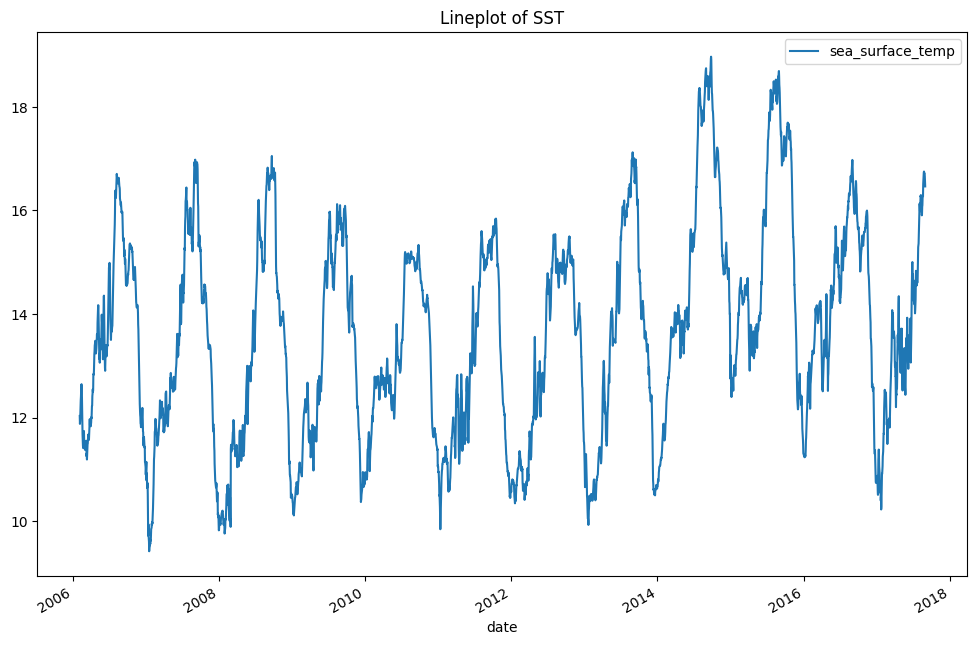

In [25]:
torpedo_wharf_cleaned_df.plot(y="sea_surface_temp",title='Lineplot of SST',figsize=(12,8))

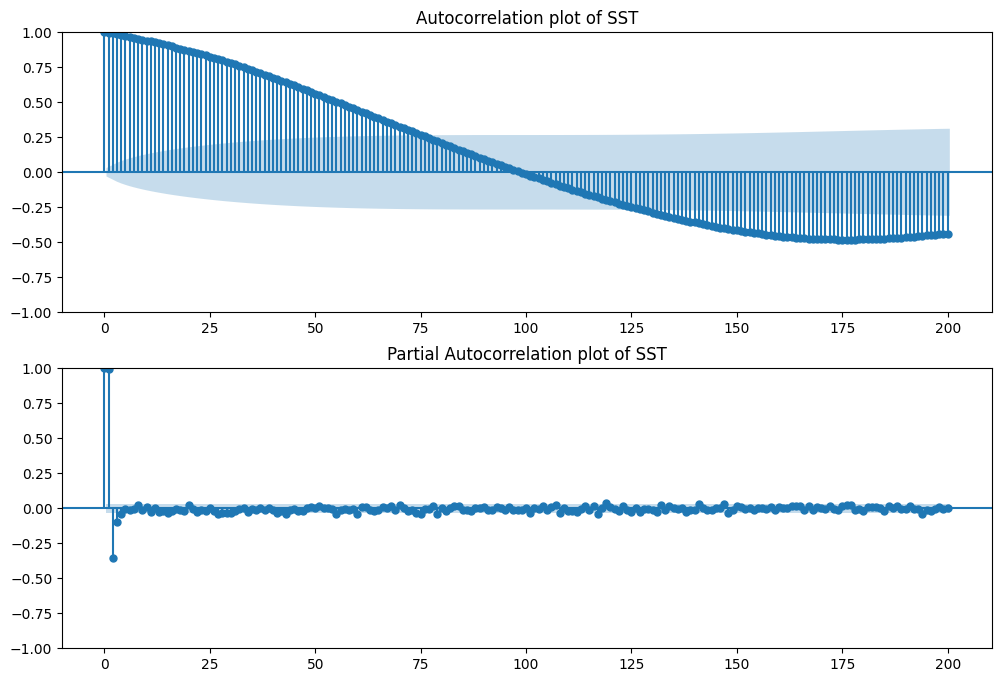

In [26]:
fig = plt.figure(figsize=(12, 8))
lags = 200
ax1 = fig.add_subplot(211)
fig = plot_acf(torpedo_wharf_cleaned_df['sea_surface_temp'].values.squeeze(), lags=lags, ax=ax1, title="Autocorrelation plot of SST")
ax2 = fig.add_subplot(212)
fig = plot_pacf(torpedo_wharf_cleaned_df['sea_surface_temp'], lags=lags, ax=ax2, title="Partial Autocorrelation plot of SST")

In [27]:
y = torpedo_wharf_cleaned_df['sea_surface_temp']
y1 = y.diff().dropna()

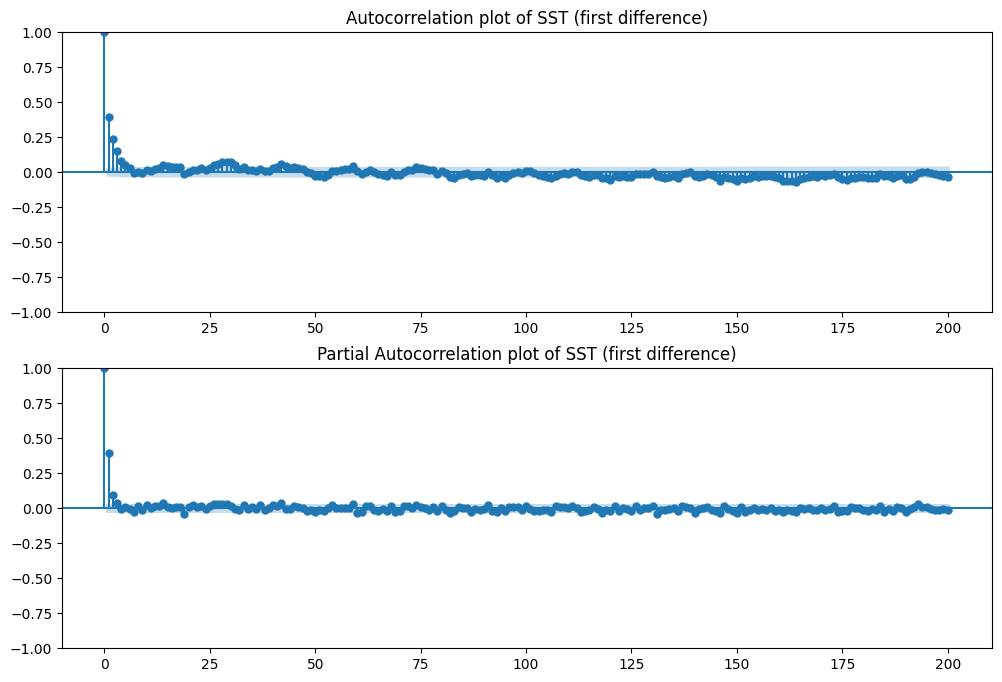

In [28]:
fig = plt.figure(figsize=(12, 8))
lags = 200
ax1 = fig.add_subplot(211)
fig = plot_acf(y1, lags=lags, ax=ax1, title="Autocorrelation plot of SST (first difference)")
ax2 = fig.add_subplot(212)
fig = plot_pacf(y1, lags=lags, ax=ax2, title="Partial Autocorrelation plot of SST (first difference)")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       sea_surface_temp   No. Observations:                 4198
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2348.466
Date:                Thu, 11 Dec 2025   AIC                          -4692.932
Time:                        00:49:24   BIC                          -4680.248
Sample:                             0   HQIC                         -4688.447
                               - 4198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3665      0.008    -47.250      0.000      -0.382      -0.351
sigma2         0.0191      0.000    105.940      0.000       0.019       0.019
Ljung-Box (L1) (Q):                  29.23   Jarque-

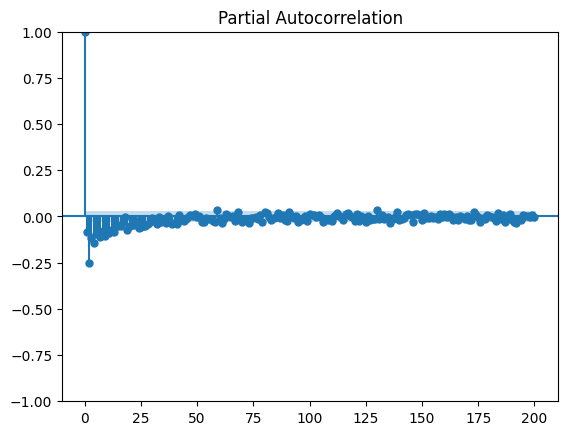

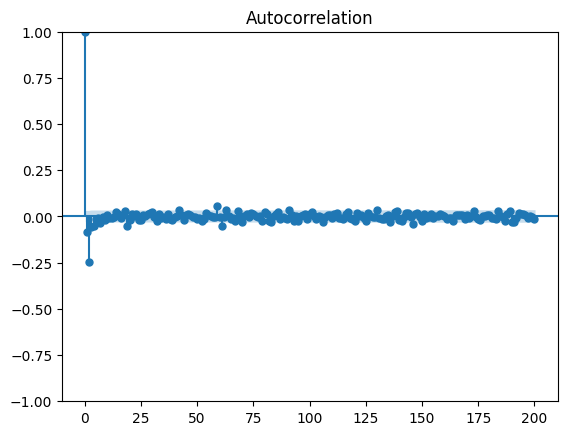

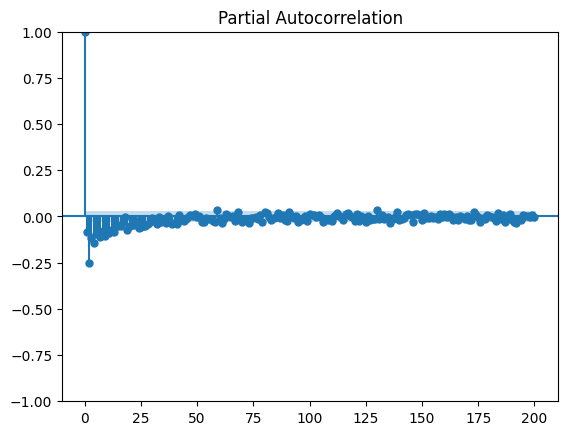

In [29]:
model = ARIMA(y1,order=(1,1,0)).fit()
print(model.summary())

plot_acf(model.resid, lags=lags)
plot_pacf(model.resid, lags=lags)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       sea_surface_temp   No. Observations:                 4198
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2460.227
Date:                Thu, 11 Dec 2025   AIC                          -4914.453
Time:                        00:49:25   BIC                          -4895.427
Sample:                             0   HQIC                         -4907.725
                               - 4198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4504      0.009    -52.598      0.000      -0.467      -0.434
ar.L2         -0.2277      0.009    -25.744      0.000      -0.245      -0.210
sigma2         0.0181      0.000    109.273      0.0

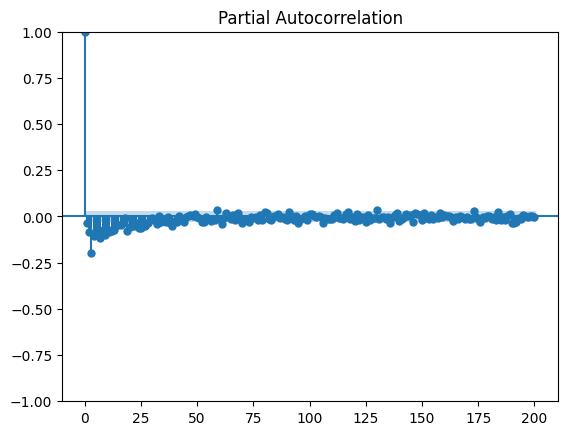

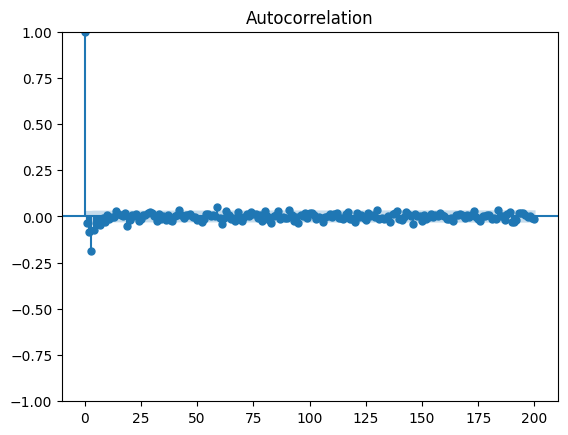

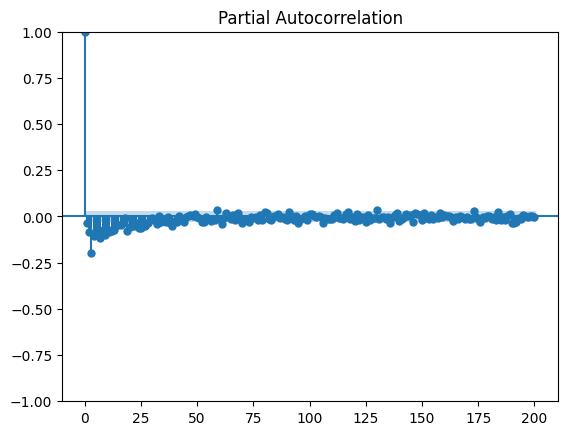

In [30]:
model = ARIMA(y1,order=(2,1,0)).fit()
print(model.summary())

plot_acf(model.resid, lags=lags)
plot_pacf(model.resid, lags=lags)